<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Using-the-fft-to-compute-correlation" data-toc-modified-id="Using-the-fft-to-compute-correlation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the fft to compute correlation</a></span></li></ul></div>

# Using the fft to compute correlation

Below I use aircraft measurments of $\theta$ and wvel taken at 25 Hz.  I compute the 
autocorrelation using numpy.correlate and numpy.fft and show they are identical, as we'd expect

In [1]:
from matplotlib import pyplot as plt
from a500.utils.data_read import download
plt.style.use('ggplot')
import urllib
import os
download('aircraft.npz',root='http://clouds.eos.ubc.ca/~phil/docs/atsc500/data')

trying http://clouds.eos.ubc.ca/~phil/docs/atsc500/data/aircraft.npz
writing to: aircraft.npz

aircraft.npz already exists
and is 732584 bytes
will not overwrite



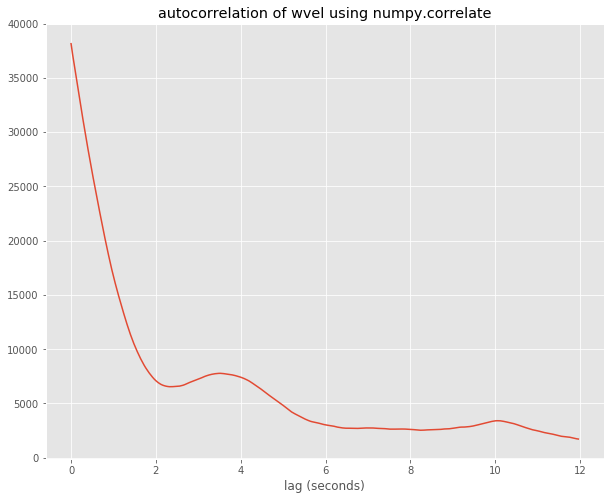

In [2]:
#http://stackoverflow.com/questions/643699/how-can-i-use-numpy-correlate-to-do-autocorrelation
import numpy as np
data = np.load('aircraft.npz')
wvel=data['wvel'] - data['wvel'].mean()
theta=data['theta'] - data['theta'].mean()
autocorr = np.correlate(wvel,wvel,mode='full')
auto_data = autocorr[wvel.size:]
ticks=np.arange(0,wvel.size)
ticks=ticks/25.
fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.set(xlabel='lag (seconds)',title='autocorrelation of wvel using numpy.correlate')
out=ax.plot(ticks[:300],auto_data[:300])


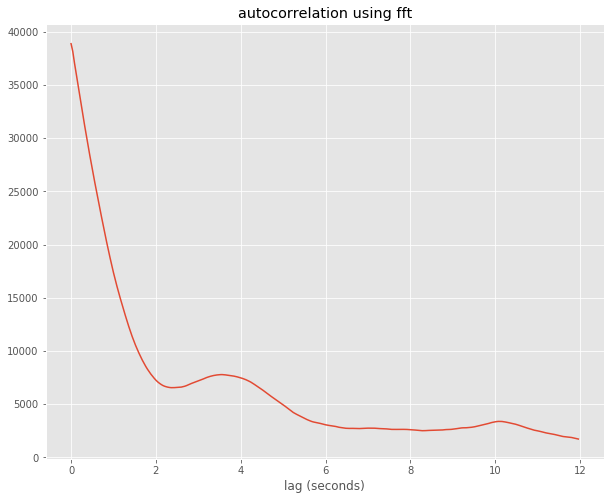

In [3]:
import numpy.fft as fft
the_fft = fft.fft(wvel)
auto_fft = the_fft*np.conj(the_fft)
auto_fft = np.real(fft.ifft(auto_fft))

fig,ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(ticks[:300],auto_fft[:300])
out=ax.set(xlabel='lag (seconds)',title='autocorrelation using fft')

In [4]:
data

In [5]:
data.keys()

['wvel', 'readme', 'theta']

In [6]:
data['readme']

array([ 'RF14 RICO flight 25 Hz variables starting at 2.4313888888888888 hours (index 8753)',
       'and ending at 3.4455555555555555 hours (index 12404) (3652 seconds)               ',
       'mean flight level is 815 m                                                        ',
       'variables are potential temperature theta (K)                                     ',
       'and vertical velocity wvel (m/s)                                                  '],
      dtype='<U82')

In [8]:
len(data['wvel'])/25.

3652.0